# <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Exercise Solutions*</span>

## <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Conceptual*</span>

#### <span style="font-family: 'NewComputerModernMath';">1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### <span style="font-family: 'NewComputerModernMath';">(a) The sample size ( n ) is extremely large, and the number of predictors ( p ) is small.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">Sample size ( n ) is extremely large, and predictors ( p ) are few.

<span style="font-family: 'NewComputerModernMath';">**Answer:**
<span style="font-family: 'NewComputerModernMath';">Better with flexible method.

<span style="font-family: 'NewComputerModernMath';">**Justification:**
- <span style="font-family: 'NewComputerModernMath';">Large ( n ) provides enough data to capture complex patterns without overfitting.
- <span style="font-family: 'NewComputerModernMath';">Low ( p ) minimizes the curse of dimensionality.
- <span style="font-family: 'NewComputerModernMath';">Examples:<span style="font-family: 'NewComputerModernMath';"> **Random Forests or Neural Networks** would outperform Linear Regression here.

#### <span style="font-family: 'NewComputerModernMath';">(b) The number of predictors ( p ) is extremely large, and the number of observations ( n ) is small.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">Extremely large ( p ), small ( n ).
    
<span style="font-family: 'NewComputerModernMath';">**Answer:**
<span style="font-family: 'NewComputerModernMath';">Worse with flexible method.

<span style="font-family: 'NewComputerModernMath';">**Justification:**
- <span style="font-family: 'NewComputerModernMath';">High-dimensional data ( p / n ) causes overfitting.
- <span style="font-family: 'NewComputerModernMath';">Inflexible methods with regularization (e.g., Lasso/Ridge) work better.
- <span style="font-family: 'NewComputerModernMath';">Flexible methods like SVM would struggle with sparse data.

#### <span style="font-family: 'NewComputerModernMath';">(c) The relationship between the predictors and response is highly non-linear.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">Highly non-linear relationship.

<span style="font-family: 'NewComputerModernMath';">**Answer:**
<span style="font-family: 'NewComputerModernMath';">Better with flexible method.

<span style="font-family: 'NewComputerModernMath';">**Justification:**
- <span style="font-family: 'NewComputerModernMath';">Flexible methods (e.g., Polynomial Regression, GAMs) can model non-linearities.
- <span style="font-family: 'NewComputerModernMath';">Inflexible methods (e.g., Linear Regression) make incorrect parametric assumptions.

#### <span style="font-family: 'NewComputerModernMath';">(d) The variance of the error terms, i.e., $\sigma^2 = \text{Var}(\epsilon)$, is extremely high.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">High error variance ($\sigma^2$).

<span style="font-family: 'NewComputerModernMath';">**Answer:**
<span style="font-family: 'NewComputerModernMath';">Worse with flexible method.

<span style="font-family: 'NewComputerModernMath';">**Justification:**
- <span style="font-family: 'NewComputerModernMath';">High noise dominates the signal in the data.
- <span style="font-family: 'NewComputerModernMath';">Flexible methods overfit to noise (i.e., they "chase the outliers").
- <span style="font-family: 'NewComputerModernMath';">Simple models (e.g., Linear Regression) are more robust to noise.
- <span style="font-family: 'NewComputerModernMath';">**Bias-Variance Tradeoff visualization:**
  <span style="font-family: 'NewComputerModernMath';">Flexible methods lead to higher variance but lower bias, while simpler models are less affected by noise and maintain a lower variance.

### <span style="font-family: 'NewComputerModernMath';">2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

#### <span style="font-family: 'NewComputerModernMath';">(a) We collect a set of data on the top 500 firms in the US. For each firm, we record profit, number of employees, industry, and the CEO's salary. We are interested in understanding which factors affect CEO salary.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">Analyze factors affecting CEO salary using data from 500 firms.

- <span style="font-family: 'NewComputerModernMath';">**Problem Type:**
  <span style="font-family: 'NewComputerModernMath';">Regression
  <span style="font-family: 'NewComputerModernMath';">*Reason:* CEO salary is a continuous numerical outcome.

- <span style="font-family: 'NewComputerModernMath';">**Focus:**
  <span style="font-family: 'NewComputerModernMath';">Inference
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to understand relationships ("which factors affect"), not predict salaries.

- <span style="font-family: 'NewComputerModernMath';">**Dimensions:**
  - <span style="font-family: 'NewComputerModernMath';">$n = 500$ (firms)
  - <span style="font-family: 'NewComputerModernMath';">$p = 3$ (profit, number of employees, industry)
      
  <span style="font-family: 'NewComputerModernMath';">*Note:* Industry may expand to multiple dummy variables if categorical, but counted as 1 predictor here.

#### <span style="font-family: 'NewComputerModernMath';">(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product, we have recorded whether it was a success or failure, the price charged for the product, the marketing budget, competition price, and ten other variables.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
<span style="font-family: 'NewComputerModernMath';">Predict product success/failure using historical data from 20 products.

- <span style="font-family: 'NewComputerModernMath';">**Problem Type:**
  <span style="font-family: 'NewComputerModernMath';">Classification
  <span style="font-family: 'NewComputerModernMath';">*Reason:* Outcome is binary (success/failure).

- <span style="font-family: 'NewComputerModernMath';">**Focus:**
  <span style="font-family: 'NewComputerModernMath';">Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to classify future products as success or failure.

- <span style="font-family: 'NewComputerModernMath';">**Dimensions:**
  - <span style="font-family: 'NewComputerModernMath';">$n = 20$ (products)
  - <span style="font-family: 'NewComputerModernMath';">$p = 13$ (price, marketing budget, competition price + 10 other variables)

#### <span style="font-family: 'NewComputerModernMath';">(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in world stock markets. Hence, we collect weekly data for all of 2012. For each week, we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

<span style="font-family: 'NewComputerModernMath';">**Scenario:**
Predict USD/Euro exchange rate % change using weekly market data.

- <span style="font-family: 'NewComputerModernMath';">**Problem Type:**
  <span style="font-family: 'NewComputerModernMath';">Regression
  <span style="font-family: 'NewComputerModernMath';">*Reason:* Outcome (% change) is continuous.

- <span style="font-family: 'NewComputerModernMath';">**Focus:**
  <span style="font-family: 'NewComputerModernMath';">Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to forecast future exchange rates.

- <span style="font-family: 'NewComputerModernMath';">**Dimensions:**
  - <span style="font-family: 'NewComputerModernMath';">$n = 52$ (weeks in 2012)
  - <span style="font-family: 'NewComputerModernMath';">$p = 3$ (% changes in US, British, and German markets)

### <span style="font-family: 'NewComputerModernMath';">3. We now revisit the bias-variance decomposition

#### <span style="font-family: 'NewComputerModernMath';">(a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

##### <span style="font-family: 'NewComputerModernMath';">Below is a code-generated approximation of the bias-variance tradeoff curves. Flexibility increases along the x-axis, and error values are on the y-axis.

##### <span style="font-family: 'NewComputerModernMath';">Note: The numbers mentioned are hypothetical in order to visually draw the example.

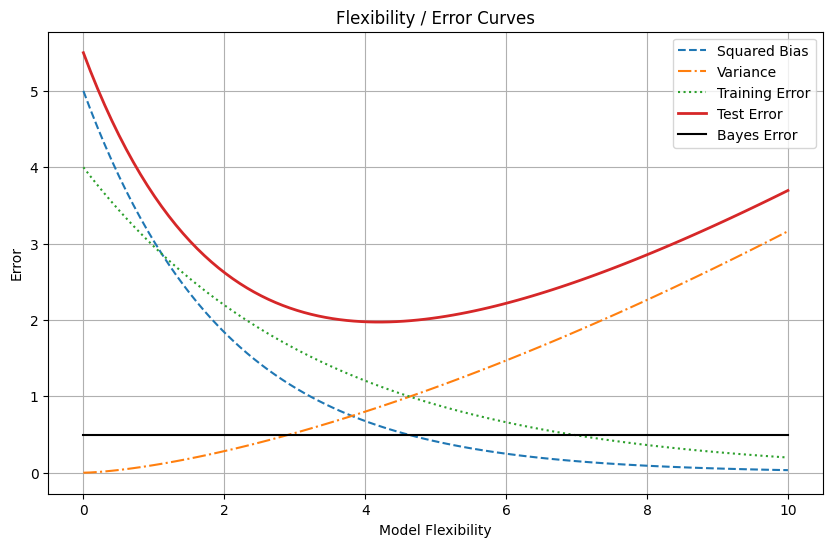

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate flexibility range
flexibility = np.linspace(0, 10, 100)

# Define curves (functional approximations)
bias_squared = 5 * np.exp(-0.5 * flexibility)  # Decreases exponentially
variance = 0.1 * flexibility ** 1.5            # Increases with flexibility
training_error = 4 * np.exp(-0.3 * flexibility) # Decreases with flexibility
test_error = bias_squared + variance + 0.5     # U-shaped (bias² + variance + irreducible error)
bayes_error = np.full_like(flexibility, 0.5)    # Constant line

plt.figure(figsize=(10, 6))
plt.plot(flexibility, bias_squared, label='Squared Bias', linestyle='--')
plt.plot(flexibility, variance, label='Variance', linestyle='-.')
plt.plot(flexibility, training_error, label='Training Error', linestyle=':')
plt.plot(flexibility, test_error, label='Test Error', linewidth=2)
plt.plot(flexibility, bayes_error, label='Bayes Error', linestyle='-', color='black')

plt.xlabel("Model Flexibility")
plt.ylabel("Error")
plt.title("Flexibility / Error Curves")
plt.legend()
plt.grid(True)
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(b) Explain why each of the five curves has the shape displayed in part (a)

1. <span style="font-family: 'NewComputerModernMath';">**Squared Bias (Decreasing Curve):**
   - <span style="font-family: 'NewComputerModernMath';">**Why it decreases:**
     <span style="font-family: 'NewComputerModernMath';">Less flexible methods (e.g., linear regression) make strong assumptions about the data, leading to high bias. As flexibility increases (e.g., polynomial regression, decision trees), models better approximate the true underlying relationship, reducing bias.

2. <span style="font-family: 'NewComputerModernMath';">**Variance (Increasing Curve):**
   - <span style="font-family: 'NewComputerModernMath';">**Why it increases:**
     <span style="font-family: 'NewComputerModernMath';">Inflexible methods have low variance because they are robust to changes in training data. Flexible methods (e.g., deep neural networks) adapt too closely to training data noise, causing high variance.

3. <span style="font-family: 'NewComputerModernMath';">**Training Error (Decreasing Curve):**
   - <span style="font-family: 'NewComputerModernMath';">**Why it decreases:**
     <span style="font-family: 'NewComputerModernMath';">More flexible models minimize training error by memorizing data (overfitting). At maximum flexibility, training error approaches zero.

4. <span style="font-family: 'NewComputerModernMath';">**Test Error (U-Shaped Curve):**
   - <span style="font-family: 'NewComputerModernMath';">**Why U-shaped:**
     <span style="font-family: 'NewComputerModernMath';">Initially, increasing flexibility reduces bias faster than variance increases, lowering test error. Beyond optimal flexibility, variance dominates, causing test error to rise.

5. <span style="font-family: 'NewComputerModernMath';">**Bayes Error (Constant Line):**
   - <span style="font-family: 'NewComputerModernMath';">**Why constant:**
     <span style="font-family: 'NewComputerModernMath';">Represents irreducible error from noise in the data. No model can reduce this error, regardless of flexibility.

---

<span style="font-family: 'NewComputerModernMath';">**Key Insight:**
- <span style="font-family: 'NewComputerModernMath';">The goal is to find the flexibility level where test error is minimized (the "sweet spot" in the U-shaped curve).
- <span style="font-family: 'NewComputerModernMath';">Overfitting occurs when the gap between training and test error grows large due to high variance.

### <span style="font-family: 'NewComputerModernMath';">4. You will now think of some real-life applications for statistical learning

#### <span style="font-family: 'NewComputerModernMath';">(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

<span style="font-family: 'NewComputerModernMath';">**1. Email Spam Detection**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Binary label (spam/ham)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Email text (word frequencies), sender domain, presence of links
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to automatically filter spam emails based on predictors.

<span style="font-family: 'NewComputerModernMath';">**2. Medical Diagnosis**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Disease presence (e.g., diabetes: yes/no)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Blood pressure, BMI, age, genetic markers
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Both
  <span style="font-family: 'NewComputerModernMath';">*Reason:* Prediction is used to diagnose a disease, and inference helps identify the risk factors for developing the disease.

<span style="font-family: 'NewComputerModernMath';">**3. Credit Risk Assessment**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Loan default risk (high/medium/low)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Credit score, income, employment history
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to predict whether a loan applicant will default on a loan.

#### <span style="font-family: 'NewComputerModernMath';">(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

<span style="font-family: 'NewComputerModernMath';">**1. House Price Prediction**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Sale price (continuous)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Square footage, location, number of bedrooms
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to predict the price of a house based on its features.

<span style="font-family: 'NewComputerModernMath';">**2. Energy Demand Forecasting**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Megawatt-hours consumed
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Temperature, time of day, population density
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Prediction
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to predict energy consumption to manage the grid efficiently.

<span style="font-family: 'NewComputerModernMath';">**3. Drug Efficacy Analysis**
- <span style="font-family: 'NewComputerModernMath';">**Response:** Reduction in symptom severity (%)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Dosage, patient age, genetic profile
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Inference
  <span style="font-family: 'NewComputerModernMath';">*Reason:* The goal is to infer the effectiveness of different drug dosages based on the predictors.

#### <span style="font-family: 'NewComputerModernMath';">(c) Describe three real-life applications in which cluster analysis might be useful

<span style="font-family: 'NewComputerModernMath';">**1. Customer Segmentation**
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Group customers by purchasing behavior
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Purchase frequency, product preferences, spending amount
- <span style="font-family: 'NewComputerModernMath';">**Use Case:** Targeted marketing campaigns

<span style="font-family: 'NewComputerModernMath';">**2. Image Segmentation**
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Group pixels into regions (e.g., objects in a photo)
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Pixel color, texture, brightness
- <span style="font-family: 'NewComputerModernMath';">**Use Case:** Computer vision (self-driving cars)

<span style="font-family: 'NewComputerModernMath';">**3. Document Topic Clustering**
- <span style="font-family: 'NewComputerModernMath';">**Goal:** Organize articles by topic
- <span style="font-family: 'NewComputerModernMath';">**Predictors:** Keywords, TF-IDF scores, authorship
- <span style="font-family: 'NewComputerModernMath';">**Use Case:** News recommendation systems

---

<span style="font-family: 'NewComputerModernMath';">**Visualization: Classification vs. Regression vs. Clustering**

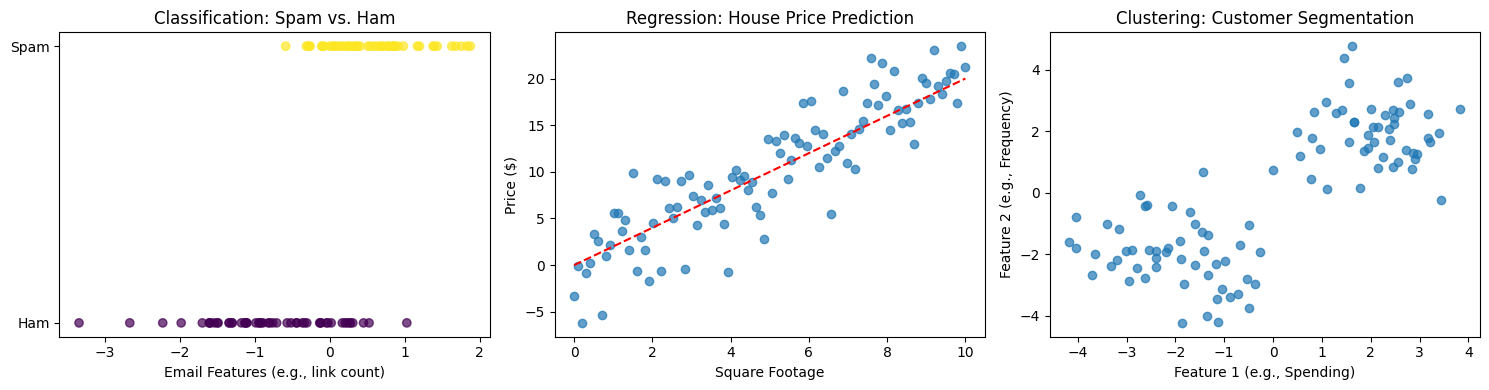

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 4))

# Classification Example
plt.subplot(1, 3, 1)
x = np.random.randn(100)
y = (x + 0.5*np.random.randn(100)) > 0
plt.scatter(x, y, c=y, cmap='viridis', alpha=0.7)
plt.title("Classification: Spam vs. Ham")
plt.xlabel("Email Features (e.g., link count)")
plt.yticks([0, 1], ["Ham", "Spam"])

# Regression Example
plt.subplot(1, 3, 2)
x = np.linspace(0, 10, 100)
y = 2*x + np.random.randn(100)*3
plt.scatter(x, y, alpha=0.7)
plt.plot(x, 2*x, color='red', linestyle='--', label="True Relationship")
plt.title("Regression: House Price Prediction")
plt.xlabel("Square Footage")
plt.ylabel("Price ($)")

# Clustering Example
plt.subplot(1, 3, 3)
x = np.concatenate([np.random.randn(50, 2) + [2, 2], np.random.randn(50, 2) + [-2, -2]])
plt.scatter(x[:, 0], x[:, 1], alpha=0.7)
plt.title("Clustering: Customer Segmentation")
plt.xlabel("Feature 1 (e.g., Spending)")
plt.ylabel("Feature 2 (e.g., Frequency)")

plt.tight_layout()
plt.show()

### <span style="font-family: 'NewComputerModernMath';">5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

##### <span style="font-family: 'NewComputerModernMath';">Advantages and Disadvantages of Flexible vs Inflexible Methods

<span style="font-family: 'NewComputerModernMath';">**Flexible Methods (e.g., Neural Networks, Splines, GAMs):**

- <span style="font-family: 'NewComputerModernMath';">**Advantages:**
  1. <span style="font-family: 'NewComputerModernMath';">Can model complex non-linear relationships.
  2. <span style="font-family: 'NewComputerModernMath';">Higher potential accuracy with sufficient data.
  3. <span style="font-family: 'NewComputerModernMath';">Automatically detect interactions between predictors.

- <span style="font-family: 'NewComputerModernMath';">**Disadvantages:**
  1. <span style="font-family: 'NewComputerModernMath';">Prone to overfitting (high variance).
  2. <span style="font-family: 'NewComputerModernMath';">Computationally expensive.
  3. <span style="font-family: 'NewComputerModernMath';">Difficult to interpret ("black box").

---

<span style="font-family: 'NewComputerModernMath';">**Less Flexible Methods (e.g., Linear Regression, Logistic Regression):**

- <span style="font-family: 'NewComputerModernMath';">**Advantages:**
  1. <span style="font-family: 'NewComputerModernMath';">Computational efficiency.
  2. <span style="font-family: 'NewComputerModernMath';">Interpretability (clear coefficient relationships).
  3. <span style="font-family: 'NewComputerModernMath';">Less prone to overfitting (low variance).

- <span style="font-family: 'NewComputerModernMath';">**Disadvantages:**
  1. <span style="font-family: 'NewComputerModernMath';">High bias if true relationship is complex.
  2. <span style="font-family: 'NewComputerModernMath';">Cannot capture non-linear patterns.
  3. <span style="font-family: 'NewComputerModernMath';">Limited predictive power for intricate data.

---

##### <span style="font-family: 'NewComputerModernMath';">When to Prefer Flexible Methods:
1. <span style="font-family: 'NewComputerModernMath';">**Large datasets** ($n \gg p$) where overfitting risk is minimized.
2. <span style="font-family: 'NewComputerModernMath';">**Complex relationships** (e.g., image recognition, natural language processing).
3. <span style="font-family: 'NewComputerModernMath';">**Prediction-focused tasks** where accuracy trumps interpretability.

---

##### <span style="font-family: 'NewComputerModernMath';">When to Prefer Less Flexible Methods:
1. <span style="font-family: 'NewComputerModernMath';">**Small datasets** ($p \approx n$) to avoid overfitting.
2. <span style="font-family: 'NewComputerModernMath';">**Inference-focused tasks** where understanding variable relationships is critical.
3. <span style="font-family: 'NewComputerModernMath';">**Simple linear relationships** (e.g., medical studies with known linear effects).

<span style="font-family: 'NewComputerModernMath';">**Key Takeaways:**
- <span style="font-family: 'NewComputerModernMath';">Flexible methods are preferred when the **signal-to-noise ratio is high** and **data is abundant**.
- <span style="font-family: 'NewComputerModernMath';">Less flexible methods excel when **interpretability matters** or the **true relationship is simple**.
- <span style="font-family: 'NewComputerModernMath';">The optimal approach often lies in balancing flexibility with regularization (e.g., ridge regression, pruning).

#### <span style="font-family: 'NewComputerModernMath';">6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

##### <span style="font-family: 'NewComputerModernMath';">Key Differences

<span style="font-family: 'NewComputerModernMath';">**Parametric Methods (e.g., Linear Regression, Logistic Regression):**
- <span style="font-family: 'NewComputerModernMath';">Assume a **fixed functional form** (e.g., linear, polynomial) defined by a finite set of parameters.
- <span style="font-family: 'NewComputerModernMath';">Model complexity is **independent of data size** (number of parameters is fixed).

<span style="font-family: 'NewComputerModernMath';">**Non-Parametric Methods (e.g., Decision Trees, K-Nearest Neighbors):**
- <span style="font-family: 'NewComputerModernMath';">**No strong assumptions** about functional form; shape is determined by the data.
- <span style="font-family: 'NewComputerModernMath';">Model complexity **grows with data size** (e.g., more splits in trees, more neighbors in KNN).

---

##### <span style="font-family: 'NewComputerModernMath';">Advantages of Parametric Approaches

1. <span style="font-family: 'NewComputerModernMath';">**Computational Efficiency:**
   - <span style="font-family: 'NewComputerModernMath';">Fewer parameters to estimate → faster training.
   - <span style="font-family: 'NewComputerModernMath';">**Example:** Linear regression solves in closed form $\hat{\beta} = (X^TX)^{-1}X^Ty$.

2.<span style="font-family: 'NewComputerModernMath';"> **Interpretability:**
   - <span style="font-family: 'NewComputerModernMath';">Clear relationships (e.g., coefficients in linear models).

3. <span style="font-family: 'NewComputerModernMath';">**Data Efficiency:**
   - <span style="font-family: 'NewComputerModernMath';">Work well with small datasets ($n \leq p$) if assumptions hold.

4. <span style="font-family: 'NewComputerModernMath';">**Less Overfitting Risk:**
   - <span style="font-family: 'NewComputerModernMath';">Constrained structure reduces variance (if model assumptions are correct).

---

##### <span style="font-family: 'NewComputerModernMath';">Disadvantages of Parametric Approaches

1. <span style="font-family: 'NewComputerModernMath';">**Model Misspecification:**
   - <span style="font-family: 'NewComputerModernMath';">Poor performance if the assumed form is incorrect (e.g., fitting a linear model to exponential data).

2. <span style="font-family: 'NewComputerModernMath';">**High Bias:**
   - <span style="font-family: 'NewComputerModernMath';">Inflexibility leads to systematic errors in complex relationships.

3. <span style="font-family: 'NewComputerModernMath';">**Limited Expressiveness:**
   - <span style="font-family: 'NewComputerModernMath';">Cannot capture interactions/non-linearities unless explicitly modeled.

#### <span style="font-family: 'NewComputerModernMath';">7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

![Data Set](e7.png)

#### <span style="font-family: 'NewComputerModernMath';">Suppose we wish to use this data set to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 0$ using K-nearest neighbors.

#### <span style="font-family: 'NewComputerModernMath';">(a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$

##### <span style="font-family: 'NewComputerModernMath';">Compute Euclidean Distances
<span style="font-family: 'NewComputerModernMath';">**Test Point:** ( ($X_1$, $X_2$, $X_3$) = ($0$, $0$, $0$) )

<span style="font-family: 'NewComputerModernMath';">Euclidean Distance Formula:
$$ \text{Distance} = \sqrt{X_1^2 + X_2^2 + X_3^2} $$
    

| Obs. | Distance Calculation | Distance Value |
|------|----------------------|---------------|
| 1    | $\textstyle\sqrt{0^2 + 3^2 + 0^2} = \sqrt{9}$ | 3.00 |
| 2    | $\textstyle\sqrt{2^2 + 0^2 + 0^2} = \sqrt{4}$ | 2.00 |
| 3    | $\textstyle\sqrt{0^2 + 1^2 + 3^2} = \sqrt{10}$ | 3.16 |
| 4    | $\textstyle\sqrt{0^2 + 1^2 + 2^2} = \sqrt{5}$ | 2.24 |
| 5    | $\textstyle\sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{2}$ | 1.41 |
| 6    | $\textstyle\sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}$ | 1.73 |

#### <span style="font-family: 'NewComputerModernMath';">(b) What is our prediction with $K = 1$? Why?

##### <span style="font-family: 'NewComputerModernMath';">Prediction with $K = 1$
- <span style="font-family: 'NewComputerModernMath';">**Nearest Observation:** Observation 5 (Distance = 1.41)
- <span style="font-family: 'NewComputerModernMath';">**Class of Observation 5:** Green
- <span style="font-family: 'NewComputerModernMath';">**Prediction:** Green

<span style="font-family: 'NewComputerModernMath';">**Why?** With $K = 1$, the algorithm uses only the closest neighbor to make the prediction.

#### <span style="font-family: 'NewComputerModernMath';">(c) What is our prediction with $K = 3$? Why?

##### <span style="font-family: 'NewComputerModernMath';">Prediction with $K = 3$
- <span style="font-family: 'NewComputerModernMath';">**3 Nearest Observations:**
  1. <span style="font-family: 'NewComputerModernMath';">Observation 5 (Green)
  2. <span style="font-family: 'NewComputerModernMath';">Observation 6 (Red)
  3. <span style="font-family: 'NewComputerModernMath';">Observation 2 (Red)
- <span style="font-family: 'NewComputerModernMath';">**Majority Vote:** 2 Red, 1 Green
- <span style="font-family: 'NewComputerModernMath';">**Prediction:** Red

<span style="font-family: 'NewComputerModernMath';">**Why?** The prediction is determined by the majority vote among the 3 nearest neighbors.

#### <span style="font-family: 'NewComputerModernMath';">(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for $K$ to be large or small? Why?

##### <span style="font-family: 'NewComputerModernMath';">Best $K$ for Nonlinear Bayes Boundary
- <span style="font-family: 'NewComputerModernMath';">**Answer:** Small $K$
- <span style="font-family: 'NewComputerModernMath';">**Reason:**
  - <span style="font-family: 'NewComputerModernMath';">A nonlinear decision boundary implies complex local patterns.
  - <span style="font-family: 'NewComputerModernMath';">Smaller $K$ captures fine-grained structures and is more flexible.
  - <span style="font-family: 'NewComputerModernMath';">Larger $K$ smooths over data, making the model less flexible and more likely to behave like a linear model.

## <span style="color: rgb(0, 105, 175);font-family: 'NewComputerModernMath';">*Applied*</span>

#### <span style="font-family: 'NewComputerModernMath';">8. This exercise relates to the College data set, which can be found in the file **College.csv** on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Private</span>: <span style="font-family: 'NewComputerModernMath';">Public/private indicator
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Apps</span>: <span style="font-family: 'NewComputerModernMath';">Number of applications received
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Accept</span>: <span style="font-family: 'NewComputerModernMath';">Number of applicants accepted
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Enroll</span>: <span style="font-family: 'NewComputerModernMath';">Number of new students enrolled
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Top10perc</span>: <span style="font-family: 'NewComputerModernMath';">New students from the top 10% of high school class
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Top25perc</span>: <span style="font-family: 'NewComputerModernMath';">New students from the top 25% of high school class
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">F.Undergrad</span>: <span style="font-family: 'NewComputerModernMath';">Number of full-time undergraduates
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">P.Undergrad</span>: <span style="font-family: 'NewComputerModernMath';">Number of part-time undergraduates
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Outstate</span>: <span style="font-family: 'NewComputerModernMath';">Out-of-state tuition
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Room.Board</span>: <span style="font-family: 'NewComputerModernMath';">Room and board costs
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Books</span>: <span style="font-family: 'NewComputerModernMath';">Estimated book costs
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Personal</span>: <span style="font-family: 'NewComputerModernMath';">Estimated personal spending
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">PhD</span>: <span style="font-family: 'NewComputerModernMath';">Percent of faculty with Ph.D.s
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Terminal</span>: <span style="font-family: 'NewComputerModernMath';">Percent of faculty with terminal degree
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">S.F.Ratio</span>: <span style="font-family: 'NewComputerModernMath';">Student/faculty ratio
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">perc.alumni</span>: <span style="font-family: 'NewComputerModernMath';">Percent of alumni who donate
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Expend</span>: <span style="font-family: 'NewComputerModernMath';">Instructional expenditure per student
- <span style="color: rgb(145, 75, 40);font-family: 'NewComputerModernMath';">Grad.Rate</span>: <span style="font-family: 'NewComputerModernMath';">Graduation rate

#### <span style="font-family: 'NewComputerModernMath';">Before reading the data into Python, it can be viewed in Excel or a text editor.

#### <span style="font-family: 'NewComputerModernMath';">(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data

In [8]:
import pandas as pd
college = pd.read_csv("College.csv")

#### <span style="font-family: 'NewComputerModernMath';">(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [9]:
college2 = pd.read_csv('College.csv', index_col =0)
college3 = college.rename ({'Unnamed: 0': 'College'},axis =1)
college3 = college3.set_index('College')

#### <span style="font-family: 'NewComputerModernMath';">This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by dictionary (key, value) pairs. Keep your modified version of the data with the following:

In [11]:
college = college3
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


#### <span style="font-family: 'NewComputerModernMath';">(c) Use the describe() method of to produce a numerical summary of the variables in the data set

In [12]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### <span style="font-family: 'NewComputerModernMath';">(d) Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C]

<Figure size 640x480 with 0 Axes>

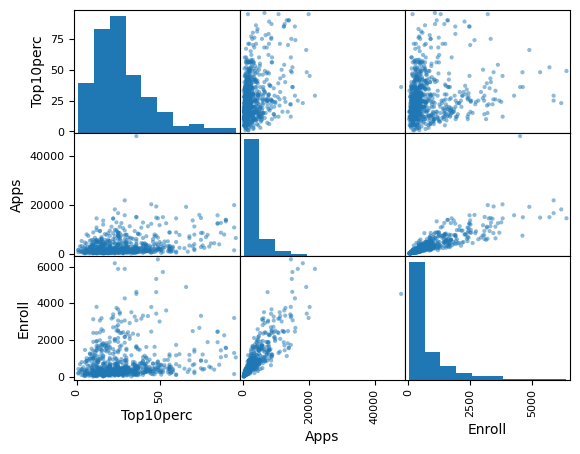

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.clf()
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private

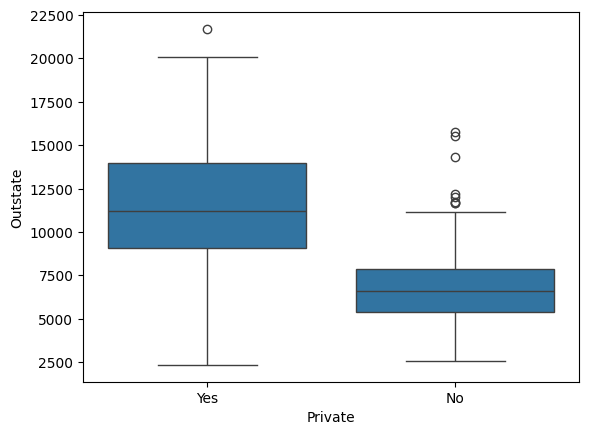

In [15]:
import seaborn as sns
plt.clf()
sns.boxplot(x='Private', y='Outstate', data=college);
plt.show()

#### <span style="font-family: 'NewComputerModernMath';"> (f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%

In [16]:
college['Elite'] = pd.cut(college['Top10perc'],[0 ,50,100] ,labels =['No', 'Yes'])

#### <span style="font-family: 'NewComputerModernMath';">Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite

In [17]:
college["Elite"].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

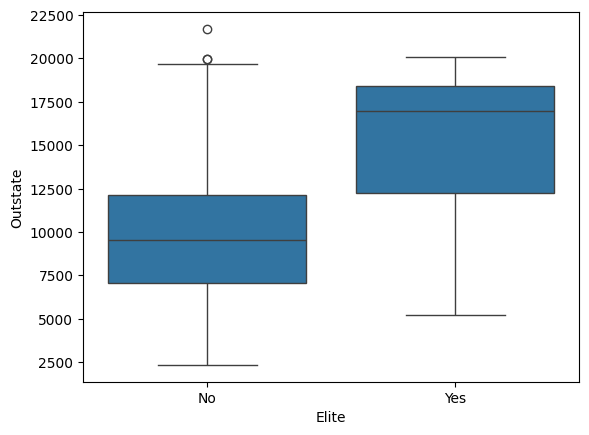

In [18]:
plt.clf() #Cleaning plot variable for the next plot
sns.boxplot(x='Elite', y='Outstate', data=college);
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(g) Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations

In [19]:
# Bins creation
college['PhD'] = pd.cut(college['PhD'], 3, labels=['Low', 'Medium', 'High'])
college['Grad.Rate'] = pd.cut(college['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college['Books'] = pd.cut(college['Books'], 2, labels=['Low', 'High'])
college['Enroll'] = pd.cut(college['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])

<Figure size 640x480 with 0 Axes>

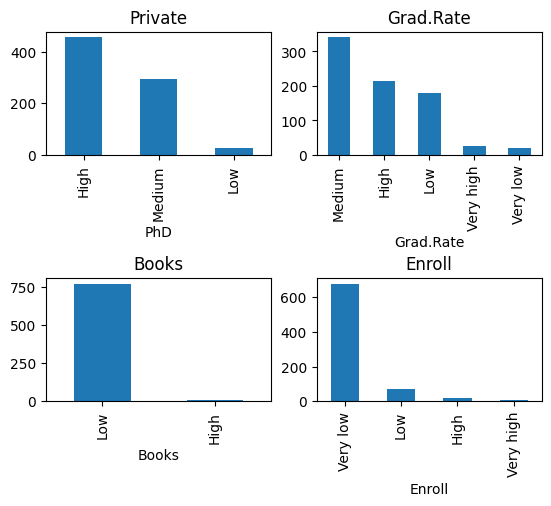

In [20]:
# Plot histograms
plt.clf()
fig = plt.figure()

plt.subplot(221)
college['PhD'].value_counts().plot(kind='bar', title = 'Private');
plt.subplot(222)
college['Grad.Rate'].value_counts().plot(kind='bar', title = 'Grad.Rate');
plt.subplot(223)
college['Books'].value_counts().plot(kind='bar', title = 'Books');
plt.subplot(224)
college['Enroll'].value_counts().plot(kind='bar', title = 'Enroll');

fig.subplots_adjust(hspace=1) # To add space between
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(g) Continue exploring the data, and provide a brief summary of what you discover
##### <span style="font-family: 'NewComputerModernMath';">The answer depends on you

#### <span style="font-family: 'NewComputerModernMath';">9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data

#### <span style="font-family: 'NewComputerModernMath';">(a) Which of the predictors are quantitative, and which are qualitative?

In [21]:
from ISLP import load_data
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [22]:
Auto.isnull().sum() #Check if there is null value in the data

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

In [23]:
Auto.nunique() #Number of unique values for each column

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
dtype: int64

##### cylinders, year and origin can be accepted as qualitative (categorical) because the number of unique value in these columns are not so much.

In [24]:
qualitative_columns = ["cylinders","year","origin"]

In [25]:
Auto[qualitative_columns]

,cylinders,year,origin
name,,,
chevrolet chevelle malibu,8,70,1
buick skylark 320,8,70,1
plymouth satellite,8,70,1
amc rebel sst,8,70,1
ford torino,8,70,1
...,...,...,...
ford mustang gl,4,82,1
vw pickup,4,82,2
dodge rampage,4,82,1


In [26]:
Auto.drop(columns=qualitative_columns)

,mpg,displacement,horsepower,weight,acceleration
name,,,,,
chevrolet chevelle malibu,18.0,307.0,130,3504,12.0
buick skylark 320,15.0,350.0,165,3693,11.5
plymouth satellite,18.0,318.0,150,3436,11.0
amc rebel sst,16.0,304.0,150,3433,12.0
ford torino,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
ford mustang gl,27.0,140.0,86,2790,15.6
vw pickup,44.0,97.0,52,2130,24.6
dodge rampage,32.0,135.0,84,2295,11.6


#### <span style="font-family: 'NewComputerModernMath';">(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy

In [27]:
pd.DataFrame([Auto.drop(columns=qualitative_columns).min(), Auto.drop(columns=qualitative_columns).max()])

,mpg,displacement,horsepower,weight,acceleration
0,9.0,68.0,46.0,1613.0,8.0
1,46.6,455.0,230.0,5140.0,24.8


##### <span style="font-family: 'NewComputerModernMath';">Min and Max value of columns are given above

In [28]:
pd.DataFrame([Auto.drop(columns=qualitative_columns).max() - Auto.drop(columns=qualitative_columns).min()])

,mpg,displacement,horsepower,weight,acceleration
0,37.6,387.0,184.0,3527.0,16.8


##### <span style="font-family: 'NewComputerModernMath';">Max - Min will give us the range

#### <span style="font-family: 'NewComputerModernMath';">(c) What is the mean and standard deviation of each quantitative predictor?

In [29]:
Auto.drop(columns=qualitative_columns).describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


#### <span style="font-family: 'NewComputerModernMath';">(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [30]:
auto_removed = Auto.drop(Auto.index[10:85])

In [31]:
auto_removed.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,25.006028,5.283688,180.120567,99.039007,2884.939716,15.713121,77.482270,1.631206
std,7.921384,1.637315,96.164263,34.197280,793.236373,2.601575,3.017394,0.830138
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.500000,70.000000,1.000000
25%,18.125000,4.000000,98.000000,74.250000,2188.500000,14.000000,75.000000,1.000000
50%,24.500000,4.000000,140.000000,90.000000,2715.500000,15.500000,78.000000,1.000000
75%,31.000000,6.000000,250.000000,112.000000,3435.250000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4952.000000,24.600000,82.000000,3.000000


#### <span style="font-family: 'NewComputerModernMath';">(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings

<Figure size 640x480 with 0 Axes>

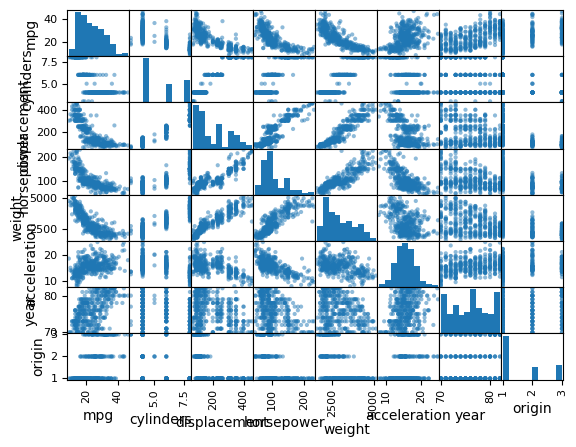

In [32]:
plt.clf()
pd.plotting.scatter_matrix(Auto)
plt.show()

#### <span style="font-family: 'NewComputerModernMath';">(g) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [33]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##### <span style="font-family: 'NewComputerModernMath';">Predictors such as Weight and Displacement seems quite related with mpg, while Acceleration, Year and Origin seems less associated (In terms of linear relationship, for non-linear relationships, we need to apply different approaches.).

#### <span style="font-family: 'NewComputerModernMath';">10. This exercise involves the Boston housing data set

#### <span style="font-family: 'NewComputerModernMath';">(a) To begin, load in the Boston data set, which is part of the ISLP library

In [34]:
Boston = load_data("Boston") #ISLP package contains the samples in the coursebook. From now on, I will use the data in the package.

#### <span style="font-family: 'NewComputerModernMath';">(b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [35]:
print("Number of rows: ", Boston.shape[0])
print("Number of cols: ", Boston.shape[1])

Number of rows:  506
Number of cols:  13


##### <span style="font-family: 'NewComputerModernMath';">Rows represent the each observation, while Columns are the predictors (parameters, information) that is about the observation.

#### <span style="font-family: 'NewComputerModernMath';">(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings

<Figure size 640x480 with 0 Axes>

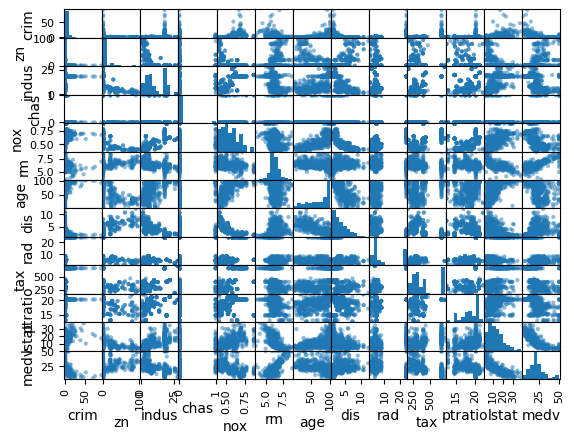

In [36]:
plt.clf()
pd.plotting.scatter_matrix(Boston)
plt.show()

##### <span style="font-family: 'NewComputerModernMath';">Each cell represents the 2d graph by using ith and jth column. These plots can be helpful by visually understanding the relationships between two paired parameters.

#### <span style="font-family: 'NewComputerModernMath';">(d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship

##### <span style="font-family: 'NewComputerModernMath';">To be able to understand the predictor - crime rate association, we can look at the plots above and try to appear that if there is a pattern between them (E.g. If there is a diagonal distribution in the plot, then that predictor has positive or negative linear association with crime rate). Or we can check the correlation map in order to get an insight.

In [37]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


##### <span style="font-family: 'NewComputerModernMath';">It seems that rad has the best (in terms of magnitude) linear relation with crime rate.

#### <span style="font-family: 'NewComputerModernMath';">(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

In [38]:
tmp_Boston = Boston[["crim","tax","ptratio"]]

In [39]:
tmp_Boston.sort_values(["crim"], ascending=False) #Sort by crime rate, descending way.

,crim,tax,ptratio
380,88.97620,666,20.2
418,73.53410,666,20.2
405,67.92080,666,20.2
410,51.13580,666,20.2
414,45.74610,666,20.2
...,...,...,...
55,0.01311,226,17.9
341,0.01301,284,15.5
285,0.01096,300,15.3
284,0.00906,285,15.3


##### <span style="font-family: 'NewComputerModernMath';">Suburb 380, 418, 405, and 410 has +50% crime rate which is very high. Following tables show the tax and pupil-teacher rate of the suburbs with a descending way

In [40]:
tmp_Boston.sort_values(["tax"], ascending=False)

,crim,tax,ptratio
492,0.11132,711,20.1
491,0.10574,711,20.1
490,0.20746,711,20.1
489,0.18337,711,20.1
488,0.15086,711,20.1
...,...,...,...
121,0.07165,188,19.1
120,0.06899,188,19.1
125,0.16902,188,19.1
124,0.09849,188,19.1


In [41]:
tmp_Boston.sort_values(["ptratio"], ascending=False)

,crim,tax,ptratio
354,0.04301,334,22.0
355,0.10659,334,22.0
135,0.55778,437,21.2
127,0.25915,437,21.2
136,0.32264,437,21.2
...,...,...,...
267,0.57834,264,13.0
268,0.54050,264,13.0
197,0.04666,329,12.6
198,0.03768,329,12.6


#### <span style="font-family: 'NewComputerModernMath';">(f) How many of the suburbs in this data set bound the Charles river?

In [42]:
print("There are: ", Boston[Boston["chas"]==1].shape[0], " suburbs that is bound the Charles river")

There are:  35  suburbs that is bound the Charles river


#### <span style="font-family: 'NewComputerModernMath';">(g) What is the median pupil-teacher ratio among the towns in this data set?

In [43]:
Boston[["ptratio"]].median()

ptratio    19.05
dtype: float64

##### <span style="font-family: 'NewComputerModernMath';">Median value of pupil-teacher rate is 19.05

#### <span style="font-family: 'NewComputerModernMath';">(h) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings

In [44]:
Boston[Boston["medv"]==Boston["medv"].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


##### <span style="font-family: 'NewComputerModernMath';">Suburb 398 and 405 has the lowest median value of owner - occupied homes

In [45]:
Boston["medv"].idxmin()

398

##### <span style="font-family: 'NewComputerModernMath';">We will continue with the Suburb 398 to make the answer simple.

In [46]:
describe = Boston.describe()
describe.loc["Range"] = Boston.max() - Boston.min()
describe.loc["Idx-398"] = Boston.loc[398]
describe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
Range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,36.240000,45.000000
Idx-398,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,30.590000,5.000000


##### <span style="font-family: 'NewComputerModernMath';">Comparison between Suburb 398 and Boston data is above.

#### <span style="font-family: 'NewComputerModernMath';">(i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [47]:
print("The number of the suburbs average more than seven rooms per dwelling is: ",Boston[Boston["rm"]>7].shape[0])

The number of the suburbs average more than seven rooms per dwelling is:  64


In [48]:
print("The number of the suburbs average more than seven rooms per dwelling is: ",Boston[Boston["rm"]>8].shape[0])

The number of the suburbs average more than seven rooms per dwelling is:  13


In [49]:
Boston[Boston["rm"]>8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000


##### <span style="font-family: 'NewComputerModernMath';">Insights about the suburbs that rooms per dwelling is more than 8

In [50]:
mean_more8 = Boston[Boston["rm"]>8].describe().loc["mean"]
mean_more8

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
lstat        4.310000
medv        44.200000
Name: mean, dtype: float64

In [51]:
mean_general = Boston.describe().loc["mean"]
mean_general

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
lstat       12.653063
medv        22.532806
Name: mean, dtype: float64

In [52]:
comparison = (mean_more8 < mean_general).replace({True: '<', False: '>'})
comparison

crim       <
zn         >
indus      <
chas       >
nox        <
rm         >
age        >
dis        <
rad        <
tax        <
ptratio    <
lstat      <
medv       >
Name: mean, dtype: object

##### <span style="font-family: 'NewComputerModernMath';">"<" states that the mean insight about a parameter for the suburbs specified above is lower than overall suburb mean. ">" states that the mean insight about a parameter for the suburbs specified above is higher than overall suburb mean.